# Data Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data Cooking

1. Load data

In [2]:
X_train_raw = pd.read_csv("data/AMF_train_X_XCZw8r3.csv")

In [3]:
X_train_raw.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


In [4]:
X_train_raw.iloc[0]

Index                                 1
Share                            Isin_8
Day                             Date_24
Trader                        Trader_10
OTR                             2.27273
OCR                             8.33333
OMR                                12.5
min_time_two_events                   0
mean_time_two_events            5117.83
10_p_time_two_events                  0
med_time_two_events             419.688
25_p_time_two_events            10.7225
75_p_time_two_events            984.321
90_p_time_two_events            23151.8
max_time_two_events             25139.6
min_lifetime_cancel             682.153
mean_lifetime_cancel            8272.77
10_p_lifetime_cancel            682.153
med_lifetime_cancel             984.321
25_p_lifetime_cancel            682.153
75_p_lifetime_cancel            23151.8
90_p_lifetime_cancel            23151.8
max_lifetime_cancel             23151.8
NbTradeVenueMic                       1
MaxNbTradesBySecond                   7


In [5]:
X_train_raw.shape

(105782, 39)

In [6]:
Y_train_raw = pd.read_csv("data/AMF_train_Y_omYQJZL.csv")

In [7]:
Y_train_raw.head()

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT


In [8]:
Y_train_raw.shape

(86, 2)

In [9]:
X_test_raw = pd.read_csv("data/AMF_test_X_uDs0jHH.csv")

In [10]:
X_test_raw.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_106,Date_12,Adelaide,1.114754,68.0,NaN,0.000012,22.905096,0.000061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1,2,Isin_94,Date_2,Adelaide,1.666667,5.0,NaN,0.001970,67.630572,0.001970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,Isin_106,Date_13,Adelaide,1.088235,37.0,NaN,0.000000,39.506490,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,4,Isin_106,Date_7,Adelaide,2.250000,4.5,NaN,0.000000,103.378733,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,Isin_106,Date_20,Adelaide,1.266667,19.0,NaN,0.000026,49.417177,0.000063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


2. Explore data

In [11]:
trader_train = set(X_train_raw['Trader'])

In [12]:
trader_seperate_train = {}

for t in trader_train:
    trader_seperate_train[t] = X_train_raw[ X_train_raw['Trader'] == t ]

In [13]:
np.array(Y_train_raw[Y_train_raw['Trader'] == t]['type'])[0]

'HFT'

In [14]:
for t in trader_train:
    print(t, "\t: ", trader_seperate_train[t].shape[0], " \t ",  np.array(Y_train_raw[Y_train_raw['Trader'] == t]['type'])[0])

Trader_330 	:  2537  	  MIX
Trader_164 	:  2300  	  MIX
Trader_435 	:  10  	  NON HFT
Trader_140 	:  582  	  MIX
Trader_245 	:  2500  	  MIX
Trader_285 	:  9  	  MIX
Trader_60 	:  23  	  NON HFT
Trader_424 	:  2048  	  NON HFT
Trader_275 	:  142  	  NON HFT
Trader_438 	:  2036  	  MIX
Trader_178 	:  95  	  NON HFT
Trader_279 	:  2352  	  NON HFT
Trader_226 	:  2486  	  HFT
Trader_237 	:  87  	  NON HFT
Trader_38 	:  301  	  MIX
Trader_54 	:  290  	  NON HFT
Trader_288 	:  79  	  NON HFT
Trader_386 	:  5808  	  HFT
Trader_293 	:  1531  	  NON HFT
Trader_278 	:  2450  	  HFT
Trader_57 	:  26  	  NON HFT
Trader_184 	:  248  	  NON HFT
Trader_431 	:  2552  	  MIX
Trader_179 	:  1254  	  NON HFT
Trader_328 	:  2534  	  HFT
Trader_26 	:  780  	  MIX
Trader_155 	:  91  	  NON HFT
Trader_398 	:  272  	  NON HFT
Trader_244 	:  497  	  HFT
Trader_161 	:  7587  	  HFT
Trader_446 	:  87  	  NON HFT
Trader_461 	:  2547  	  MIX
Trader_191 	:  4  	  NON HFT
Trader_132 	:  789  	  HFT
Trader_177 	:  3

In [15]:
from collections import Counter
print(Counter(Y_train_raw['type']))

Counter({'NON HFT': 47, 'MIX': 24, 'HFT': 15})


3. Deal with NaN data and extract the numeric columns

In [18]:
# columns_kept = []
# for col, cnt in X_train_raw.isna().sum().items():
#     if cnt <= 0:
#         columns_kept.append(col)

In [16]:
X_train_pd = X_train_raw.fillna(0)

In [17]:
X_train_pd

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.000000,5117.830300,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.000000,1846.968401,0.000074,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.000000,686.300630,0.000071,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.000000,2174.335265,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,0.000000,0.000000,944.008551,0.000071,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,38
5,6,Isin_27,Date_26,Trader_10,1.233129,201.000000,11.823529,0.000000,0.943412,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,27
6,7,Isin_117,Date_24,Trader_10,2.100000,5.250000,0.000000,0.000000,380.267415,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5
7,8,Isin_12,Date_5,Trader_10,1.472727,13.500000,81.000000,0.000000,580.891842,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,14
8,9,Isin_12,Date_7,Trader_10,1.633333,16.333333,16.333333,0.000000,1932.224487,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10
9,10,Isin_117,Date_7,Trader_10,1.782609,8.200000,41.000000,0.000000,5834.927530,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8


In [18]:
X_train_pd['Share_num'] = X_train_pd.apply(lambda row: int(re.sub("[^0-9]", "",row['Share']) ), axis=1 )
X_train_pd['Date_num'] = X_train_pd.apply(lambda row: int(re.sub("[^0-9]", "",row['Day']) ), axis=1 )

#     print(row)

In [19]:
X_train_pd.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,Share_num,Date_num
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8,24
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,87,29
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,87,23
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,12,11
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,0.000000,0.0,944.008551,0.000071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,87,9


In [20]:
isNft_numeric = {'NON HFT': 0, 'MIX': 1, 'HFT': 2}

In [21]:
trader_type_train = {}

for index, row in Y_train_raw.iterrows():
    trader_type_train[row['Trader']] = isNft_numeric[ row['type']]

In [22]:
trader_type_train

{'Trader_285': 1,
 'Trader_114': 0,
 'Trader_110': 0,
 'Trader_57': 0,
 'Trader_128': 0,
 'Trader_328': 2,
 'Trader_59': 0,
 'Trader_435': 0,
 'Trader_293': 0,
 'Trader_245': 1,
 'Trader_280': 0,
 'Trader_158': 0,
 'Trader_60': 0,
 'Trader_179': 0,
 'Trader_208': 0,
 'Trader_222': 0,
 'Trader_237': 0,
 'Trader_256': 0,
 'Trader_184': 0,
 'Trader_398': 0,
 'Trader_425': 0,
 'Trader_26': 1,
 'Trader_424': 0,
 'Trader_205': 1,
 'Trader_395': 1,
 'Trader_358': 1,
 'Trader_169': 0,
 'Trader_54': 0,
 'Trader_164': 1,
 'Trader_46': 0,
 'Trader_386': 2,
 'Trader_177': 0,
 'Trader_430': 1,
 'Trader_16': 0,
 'Trader_221': 0,
 'Trader_279': 0,
 'Trader_127': 0,
 'Trader_442': 0,
 'Trader_446': 0,
 'Trader_120': 2,
 'Trader_38': 1,
 'Trader_255': 0,
 'Trader_41': 0,
 'Trader_10': 0,
 'Trader_178': 0,
 'Trader_257': 0,
 'Trader_132': 2,
 'Trader_136': 2,
 'Trader_453': 2,
 'Trader_340': 0,
 'Trader_338': 1,
 'Trader_233': 1,
 'Trader_431': 1,
 'Trader_329': 1,
 'Trader_191': 0,
 'Trader_310': 1,
 '

In [23]:
X_train_pd['is_NFT'] = X_train_pd.apply( lambda row: trader_type_train[row['Trader']], axis=1 )

In [24]:
X_train_pd.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,Share_num,Date_num,is_NFT
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,4,8,24,0
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,0.0,0.0,0.0,0.0,0.0,0.0,15,87,29,0
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,0.0,0.0,0.0,0.0,0.0,0.0,63,87,23,0
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,4,12,11,0
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,0.000000,0.0,944.008551,0.000071,...,0.0,0.0,0.0,0.0,0.0,0.0,38,87,9,0


## Prediction by Row

In [25]:
X_train_pd.columns

Index(['Index', 'Share', 'Day', 'Trader', 'OTR', 'OCR', 'OMR',
       'min_time_two_events', 'mean_time_two_events', '10_p_time_two_events',
       'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel',
       'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'NbSecondWithAtLeatOneTrade',
       'Share_num', 'Date_num', 'is_NFT'],
      dtype='object')

In [26]:
Y_np = np.array(X_train_pd['is_NFT'])

In [27]:
X_np = np.array(X_train_pd[ [ 'OTR', 'OCR', 'OMR',
       'min_time_two_events', 'mean_time_two_events', '10_p_time_two_events',
       'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel',
       'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'NbSecondWithAtLeatOneTrade',
       'Share_num', 'Date_num'] ])

(array([22349.,     0.,     0.,     0.,     0., 51483.,     0.,     0.,
            0., 31950.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

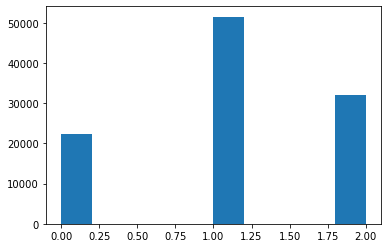

In [28]:
plt.hist(Y_np)

### Random Forest

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_np, Y_np, test_size=0.20, random_state=42)

In [31]:
# clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
clf_rfc = RandomForestClassifier(random_state=0, max_depth= 32).fit(X_train, y_train)

In [32]:
y_predict = clf_rfc.predict(X_test)

In [33]:
f1_score(y_predict, y_test, average="macro")

0.9760243372376397

In [34]:
accuracy_score(y_predict, y_test)

0.9779741929385074

In [182]:
clf.feature_importances_

array([0.03251999, 0.07312688, 0.07351076, 0.01396047, 0.03130771,
       0.01766907, 0.01217912, 0.01524953, 0.01879606, 0.0364011 ,
       0.03888469, 0.11000206, 0.02907739, 0.06201563, 0.04312505,
       0.03964415, 0.03062146, 0.02450409, 0.02423076, 0.06190478,
       0.00763776, 0.0144003 , 0.02361046, 0.00710181, 0.0148455 ,
       0.01810756, 0.01212926, 0.01625883, 0.02708083, 0.00927432,
       0.01688339, 0.01470131, 0.00546747, 0.00552355, 0.01223743,
       0.00328854, 0.00272093])

In [36]:
f1_score(clf_rfc.predict(X_train), y_train, average="micro")

0.9999881831610045

In [53]:
X_train.shape[1]

37

### Pytorch Deep Learning

In [66]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [56]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [76]:
net = Net().to(device)

In [77]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [94]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(zip(X_train, y_train)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs =  torch.tensor([inputs.astype(np.float32)]).to(device)
        labels =  torch.tensor([labels]).to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
#         print(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 0.674
[1,  4000] loss: 0.545
[1,  6000] loss: 0.568
[1,  8000] loss: 0.542
[1, 10000] loss: 0.561
[1, 12000] loss: 0.738
[1, 14000] loss: 0.522
[1, 16000] loss: 0.537
[1, 18000] loss: 0.546
[1, 20000] loss: 0.586
[1, 22000] loss: 0.554
[1, 24000] loss: 0.580
[1, 26000] loss: 0.540
[1, 28000] loss: 0.523
[1, 30000] loss: 0.532
[1, 32000] loss: 0.480
[1, 34000] loss: 0.582
[1, 36000] loss: 0.555
[1, 38000] loss: 0.579
[1, 40000] loss: 0.566
[1, 42000] loss: 0.535
[1, 44000] loss: 0.640
[1, 46000] loss: 0.532
[1, 48000] loss: 0.548
[1, 50000] loss: 0.558


KeyboardInterrupt: 

In [92]:
correct = 0
for i, data in enumerate(zip(X_train, y_train)):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs =  torch.tensor([inputs.astype(np.float32)]).to(device)
    labels =  torch.tensor([labels]).to(device)
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
#     print(outputs, labels)
    for output, label in zip(outputs, labels):
#         print(torch.argmax(output), label)
        if torch.argmax(output) == label:
            correct += 1

accuracy

In [93]:
correct / X_train.shape[0]

0.8180797636632201

### Tensorflow Deep Learning

In [37]:
import tensorflow as tf

In [103]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(120, activation='relu'))
    model.add(tf.keras.layers.Dense(120, activation='relu'))
    model.add(tf.keras.layers.Dense(84, activation='relu'))
    model.add(tf.keras.layers.Dense(1, 'relu'))
    model.compile(loss="mse", optimizer='adam', metrics=["accuracy"])
#     model.summary()
    return model

In [104]:
epochs = 4
batch_size = 256

In [105]:
y_train

array([1, 0, 0, ..., 1, 0, 2], dtype=int64)

In [106]:
model = build_model()
model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, shuffle=True)

Train on 67700 samples, validate on 16925 samples
Epoch 1/4
67700/67700 [==============================] - 1s 21us/sample - loss: 79624.9059 - accuracy: 0.2126 - val_loss: 1.6818 - val_accuracy: 0.2161
Epoch 2/4
67700/67700 [==============================] - 1s 15us/sample - loss: 1.6931 - accuracy: 0.2111 - val_loss: 1.6818 - val_accuracy: 0.2161
Epoch 3/4
67700/67700 [==============================] - 1s 15us/sample - loss: 1.6931 - accuracy: 0.2111 - val_loss: 1.6818 - val_accuracy: 0.2161
Epoch 4/4
67700/67700 [==============================] - 1s 15us/sample - loss: 1.6931 - accuracy: 0.2111 - val_loss: 1.6818 - val_accuracy: 0.2161


In [100]:
y_predict = model.predict_classes(X_test)

In [101]:
y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [102]:
accuracy_score(y_predict, y_test)

0.20801625939405397

### SVC

In [96]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [97]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [98]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [100]:
y_predict = clf.predict(X_test)

In [101]:
accuracy_score(y_predict, y_test)

0.8886893226828

In [103]:
f1_score(y_predict, y_test, average="macro")

0.8870252334439375

## Cross Validation

In [104]:
from sklearn.model_selection import cross_val_score

In [106]:
clf_rfc = RandomForestClassifier(random_state=0, max_depth= 32)

In [ ]:
scores = cross_val_score(clf_rfc, X_np, Y_np, cv = 5)

## Prediction by Trader

In [157]:
def get_trader_data(trader, clf, X_train_pd):
    X_trader = X_train_pd[X_train_pd['Trader'] == trader]
    X_np = np.array(X_trader[ [ 'OTR', 'OCR', 'OMR',
       'min_time_two_events', 'mean_time_two_events', '10_p_time_two_events',
       'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel',
       'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'NbSecondWithAtLeatOneTrade',
       'Share_num', 'Date_num'] ])
    y_trader = clf.predict(X_np)
    y_count = Counter(y_trader)
    y_dist = np.zeros(3)
    for t in y_count:
        y_dist[t] = y_count[t]
    return y_dist

In [184]:
X_trader_train = np.zeros( (len(trader_train), 3) )
y_trader_train = np.zeros( len(trader_train) )

In [185]:
i = 0
for trader in trader_train:
    X_trader_train[i, :] = get_trader_data(trader, clf, X_train_pd)
    y_trader_train[i] = trader_type_train[trader]
    i += 1

In [209]:
X_trader_train

array([[2.7100e+02, 1.0000e+00, 0.0000e+00],
       [1.2490e+03, 2.0000e+00, 3.0000e+00],
       [1.0000e+00, 1.0000e+00, 2.4100e+02],
       [3.4000e+01, 0.0000e+00, 0.0000e+00],
       [8.6000e+01, 1.0000e+00, 0.0000e+00],
       [1.8000e+01, 2.2810e+03, 1.0000e+00],
       [7.5000e+01, 2.0000e+00, 2.0000e+00],
       [5.2000e+01, 2.0000e+00, 1.0000e+00],
       [7.0000e+00, 6.9000e+02, 3.0000e+00],
       [0.0000e+00, 5.0440e+03, 0.0000e+00],
       [0.0000e+00, 1.0000e+00, 2.4490e+03],
       [1.0000e+00, 2.5460e+03, 0.0000e+00],
       [0.0000e+00, 2.8000e+01, 1.0000e+00],
       [5.0000e+00, 1.8280e+03, 3.0000e+00],
       [9.7000e+01, 1.0000e+00, 0.0000e+00],
       [1.7400e+02, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 2.5520e+03, 0.0000e+00],
       [2.7300e+02, 1.3000e+01, 4.0000e+00],
       [4.0000e+00, 0.0000e+00, 0.0000e+00],
       [3.2300e+02, 1.0000e+00, 3.0000e+00],
       [2.3000e+01, 0.0000e+00, 0.0000e+00],
       [9.5000e+01, 0.0000e+00, 0.0000e+00],
       [0.

In [186]:
clf_trader = LogisticRegression(random_state=0).fit(X_trader_train, y_trader_train)

In [187]:
accuracy_score(clf_trader.predict(X_trader_train), y_trader_train)

1.0

In [188]:
clf_trader.coef_

array([[ 0.2530981 , -0.40183342, -0.37736022],
       [-0.10431545,  0.4854388 , -0.08550203],
       [-0.14878265, -0.08360538,  0.46286225]])

## Apply to the test data

In [189]:
X_test_raw.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_106,Date_12,Adelaide,1.114754,68.0,NaN,0.000012,22.905096,0.000061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1,2,Isin_94,Date_2,Adelaide,1.666667,5.0,NaN,0.001970,67.630572,0.001970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,Isin_106,Date_13,Adelaide,1.088235,37.0,NaN,0.000000,39.506490,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,4,Isin_106,Date_7,Adelaide,2.250000,4.5,NaN,0.000000,103.378733,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,Isin_106,Date_20,Adelaide,1.266667,19.0,NaN,0.000026,49.417177,0.000063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [190]:
trader_test = set(X_test_raw['Trader'])
X_test_pd = X_test_raw.fillna(0)
X_test_pd['Share_num'] = X_test_pd.apply(lambda row: int(re.sub("[^0-9]", "",row['Share']) ), axis=1 )
X_test_pd['Date_num'] = X_test_pd.apply(lambda row: int(re.sub("[^0-9]", "",row['Day']) ), axis=1 )

In [191]:
len(trader_test)

85

In [192]:
X_test_pd.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,Share_num,Date_num
0,1,Isin_106,Date_12,Adelaide,1.114754,68.0,0.0,0.000012,22.905096,0.000061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,106,12
1,2,Isin_94,Date_2,Adelaide,1.666667,5.0,0.0,0.001970,67.630572,0.001970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,94,2
2,3,Isin_106,Date_13,Adelaide,1.088235,37.0,0.0,0.000000,39.506490,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,106,13
3,4,Isin_106,Date_7,Adelaide,2.250000,4.5,0.0,0.000000,103.378733,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,106,7
4,5,Isin_106,Date_20,Adelaide,1.266667,19.0,0.0,0.000026,49.417177,0.000063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,106,20


In [193]:
X_trader_test = np.zeros( (len(trader_test), 3) )

In [194]:
i = 0
for trader in trader_test:
    X_trader_test[i, :] = get_trader_data(trader, clf, X_test_pd)
    i += 1

In [195]:
X_trader_test

array([[7.000e+00, 1.700e+01, 1.280e+02],
       [1.600e+01, 7.000e+00, 3.000e+00],
       [5.700e+01, 5.600e+01, 6.090e+02],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [3.600e+01, 1.000e+00, 0.000e+00],
       [3.800e+01, 1.970e+03, 4.200e+01],
       [1.793e+03, 4.000e+00, 0.000e+00],
       [1.290e+02, 9.300e+01, 6.018e+03],
       [0.000e+00, 0.000e+00, 2.097e+03],
       [1.529e+03, 7.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00, 7.070e+02],
       [2.400e+02, 2.200e+01, 3.000e+01],
       [2.000e+00, 2.110e+03, 4.000e+00],
       [1.200e+01, 2.095e+03, 1.000e+00],
       [5.300e+01, 5.000e+00, 0.000e+00],
       [2.500e+01, 2.002e+03, 8.600e+01],
       [4.000e+00, 1.991e+03, 2.000e+00],
       [3.200e+01, 0.000e+00, 0.000e+00],
       [1.000e+01, 2.100e+01, 1.000e+00],
       [2.170e+02, 6.800e+01, 4.180e+02],
       [4.000e+00, 0.000e+00, 0.000e+00],
       [6.100e+01, 1.100e+01, 0.000e+00],
       [0.000e+00, 0.000e+00, 4.748e+03],
       [2.100e+01, 4.830e+02, 1.50

In [196]:
y_trader_predict = clf_trader.predict(X_trader_test)

In [200]:
np.max(clf_trader.predict_proba(X_trader_test), axis=1)

array([1.        , 0.91695065, 1.        , 0.96952905, 0.99999985,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999999,
       1.        , 1.        , 0.9999997 , 0.99998231, 1.        ,
       0.99003203, 0.99999987, 1.        , 1.        , 0.96952905,
       1.        , 1.        , 1.        , 0.54098817, 1.        ,
       0.92158892, 1.        , 0.97895808, 0.99999974, 1.        ,
       1.        , 0.99999995, 1.        , 1.        , 0.998954  ,
       1.        , 1.        , 1.        , 0.99999999, 0.99677067,
       0.96952905, 0.96952905, 0.99998416, 1.        , 1.        ,
       0.99999795, 0.99999957, 0.9999997 , 0.54309166, 1.        ,
       0.99977188, 0.99999882, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.98170592, 1.        , 1.        ,
       1.        , 0.99692681, 1.        , 1.        , 1.     

(array([45.,  0.,  0.,  0.,  0., 26.,  0.,  0.,  0., 14.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

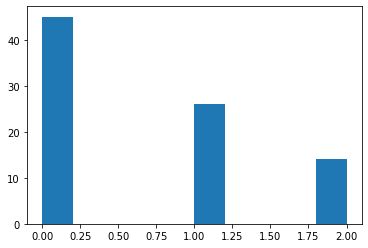

In [202]:
plt.hist(y_trader_predict)

## Output

In [203]:
ind2trader = {0:'NON HFT', 1:'MIX', 2:'HFT'}

In [204]:
output_np = []

In [205]:
for index, trader in enumerate(trader_test):
    output_np.append([trader, ind2trader[y_trader_predict[index]]])
output_np = np.array(output_np)

In [206]:
output = pd.DataFrame(output_np)

In [207]:
output.columns = ['Trader', 'type']

In [208]:
output.to_csv("data/output.csv", index=None)